In [15]:
import diplib as dip
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 600

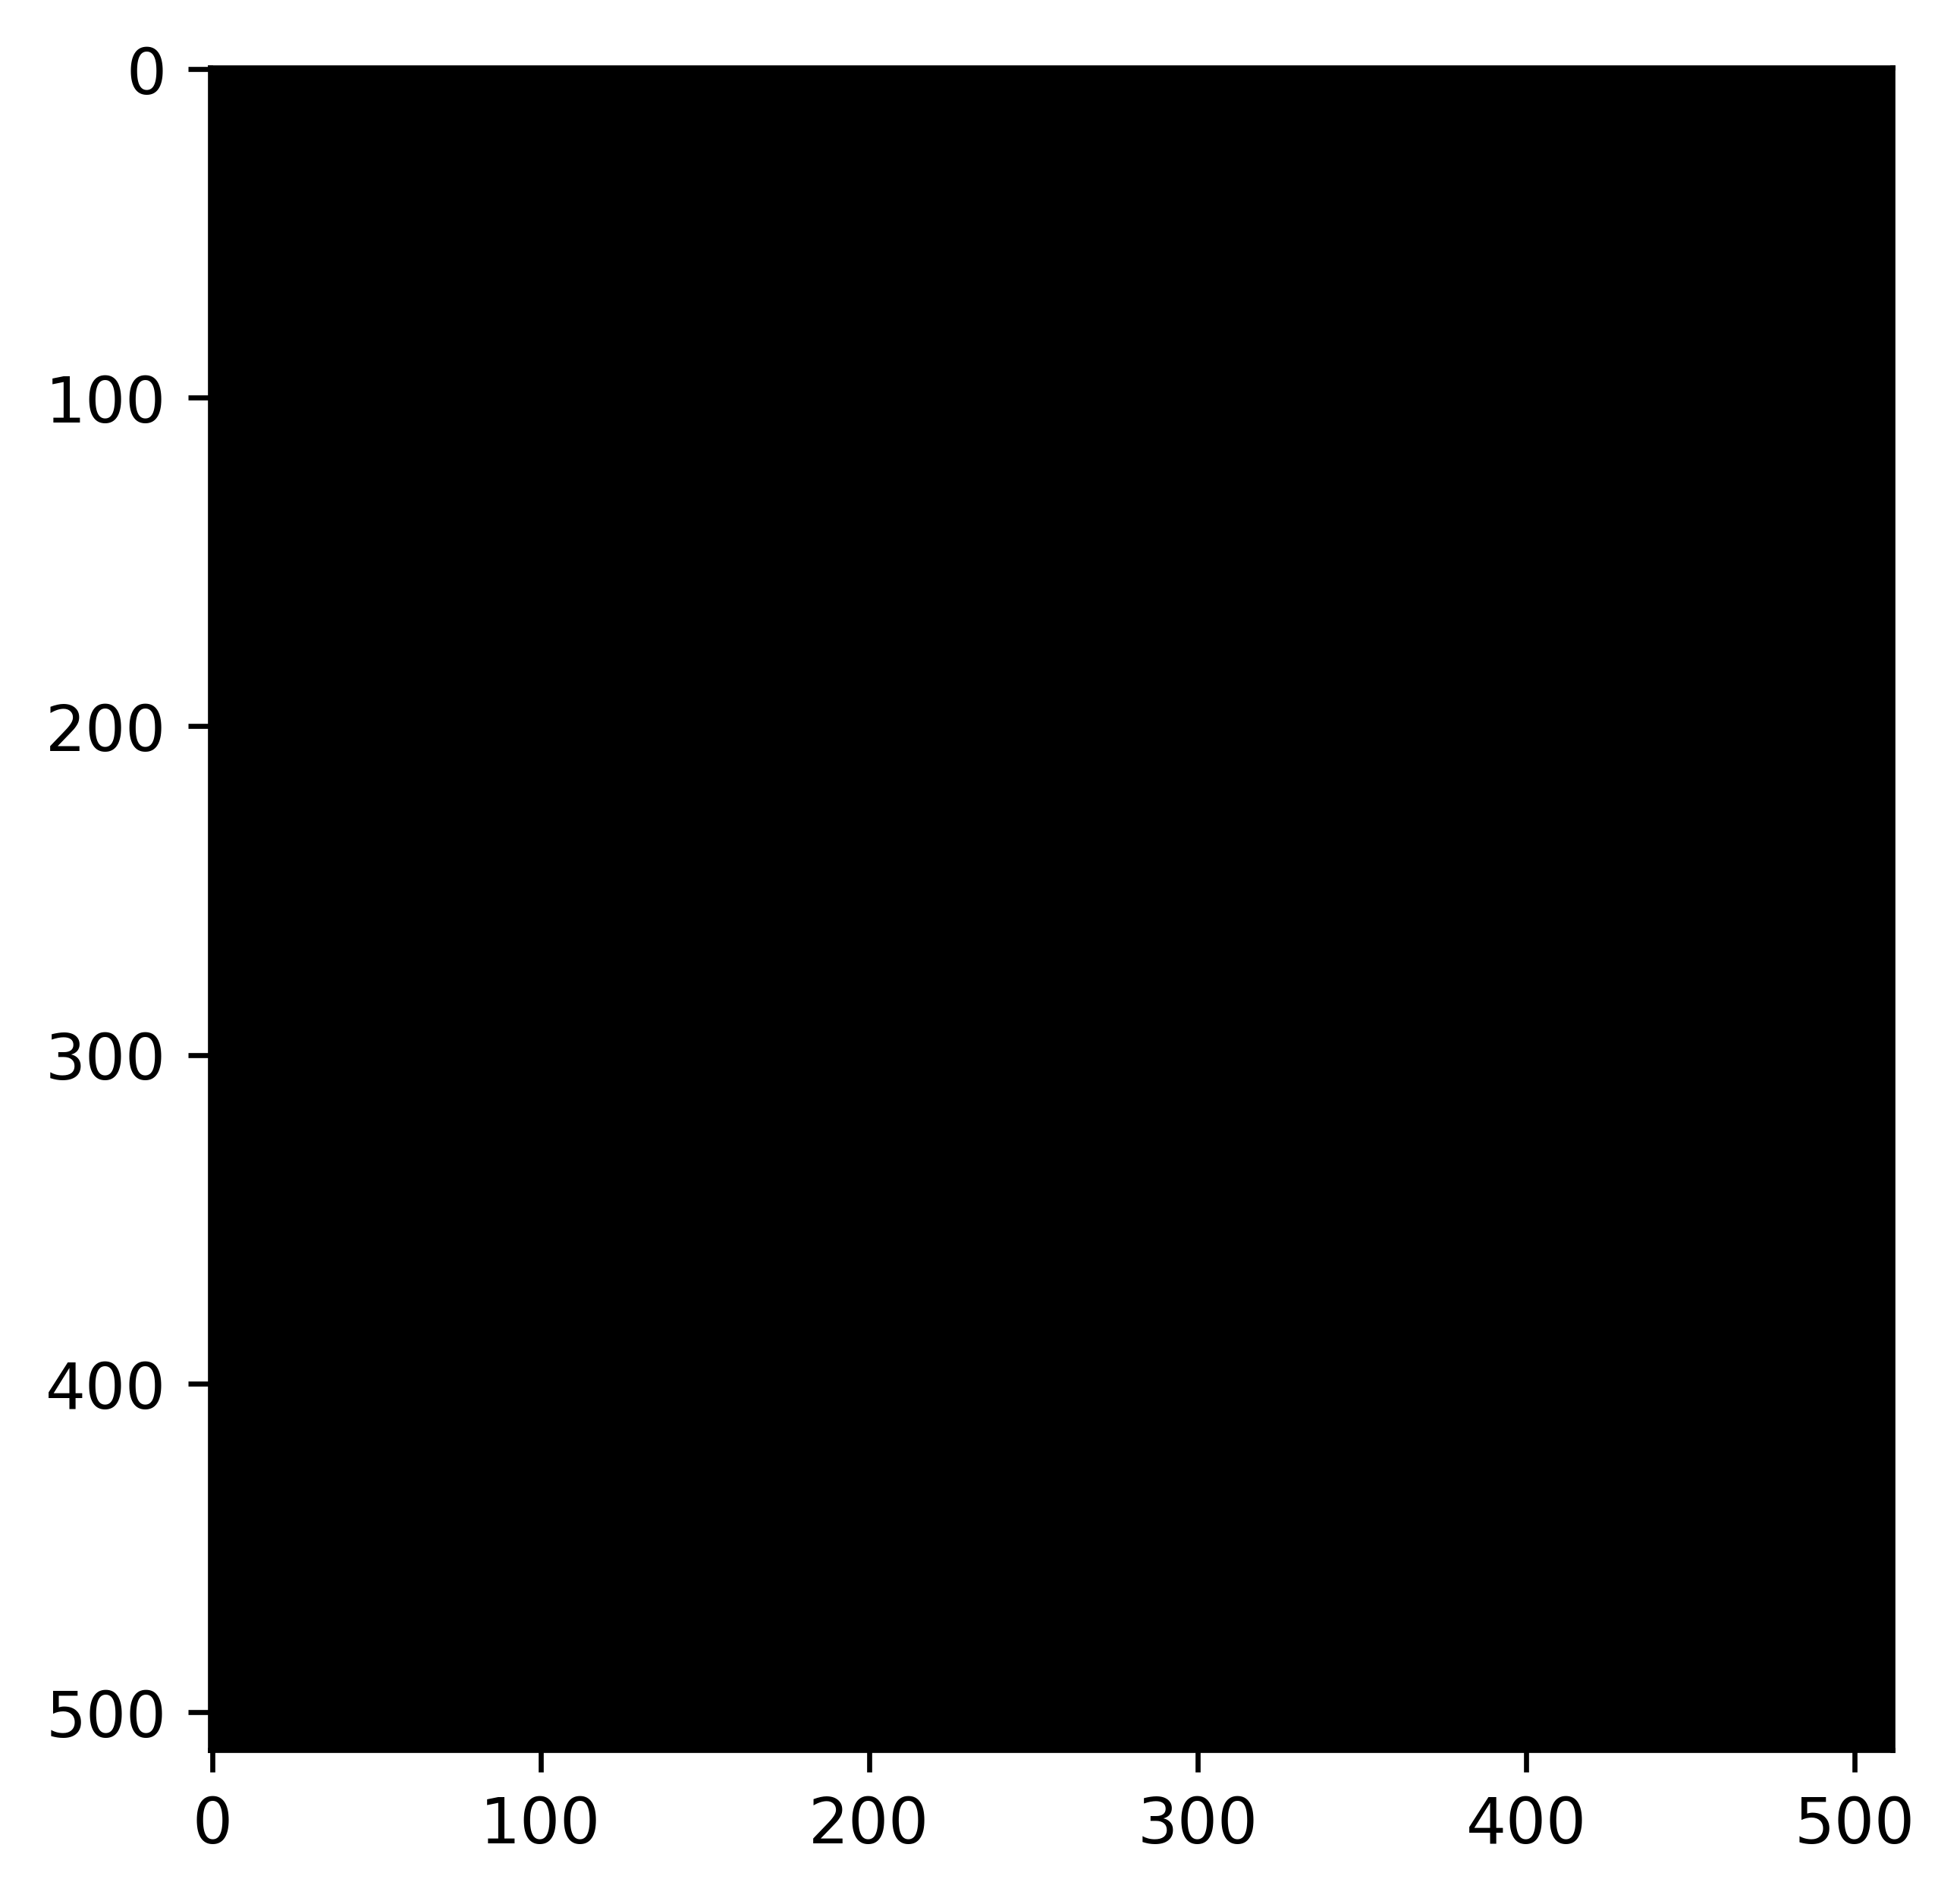

In [16]:
a = dip.Image((512, 512))
a.Fill(0)
a.Show()

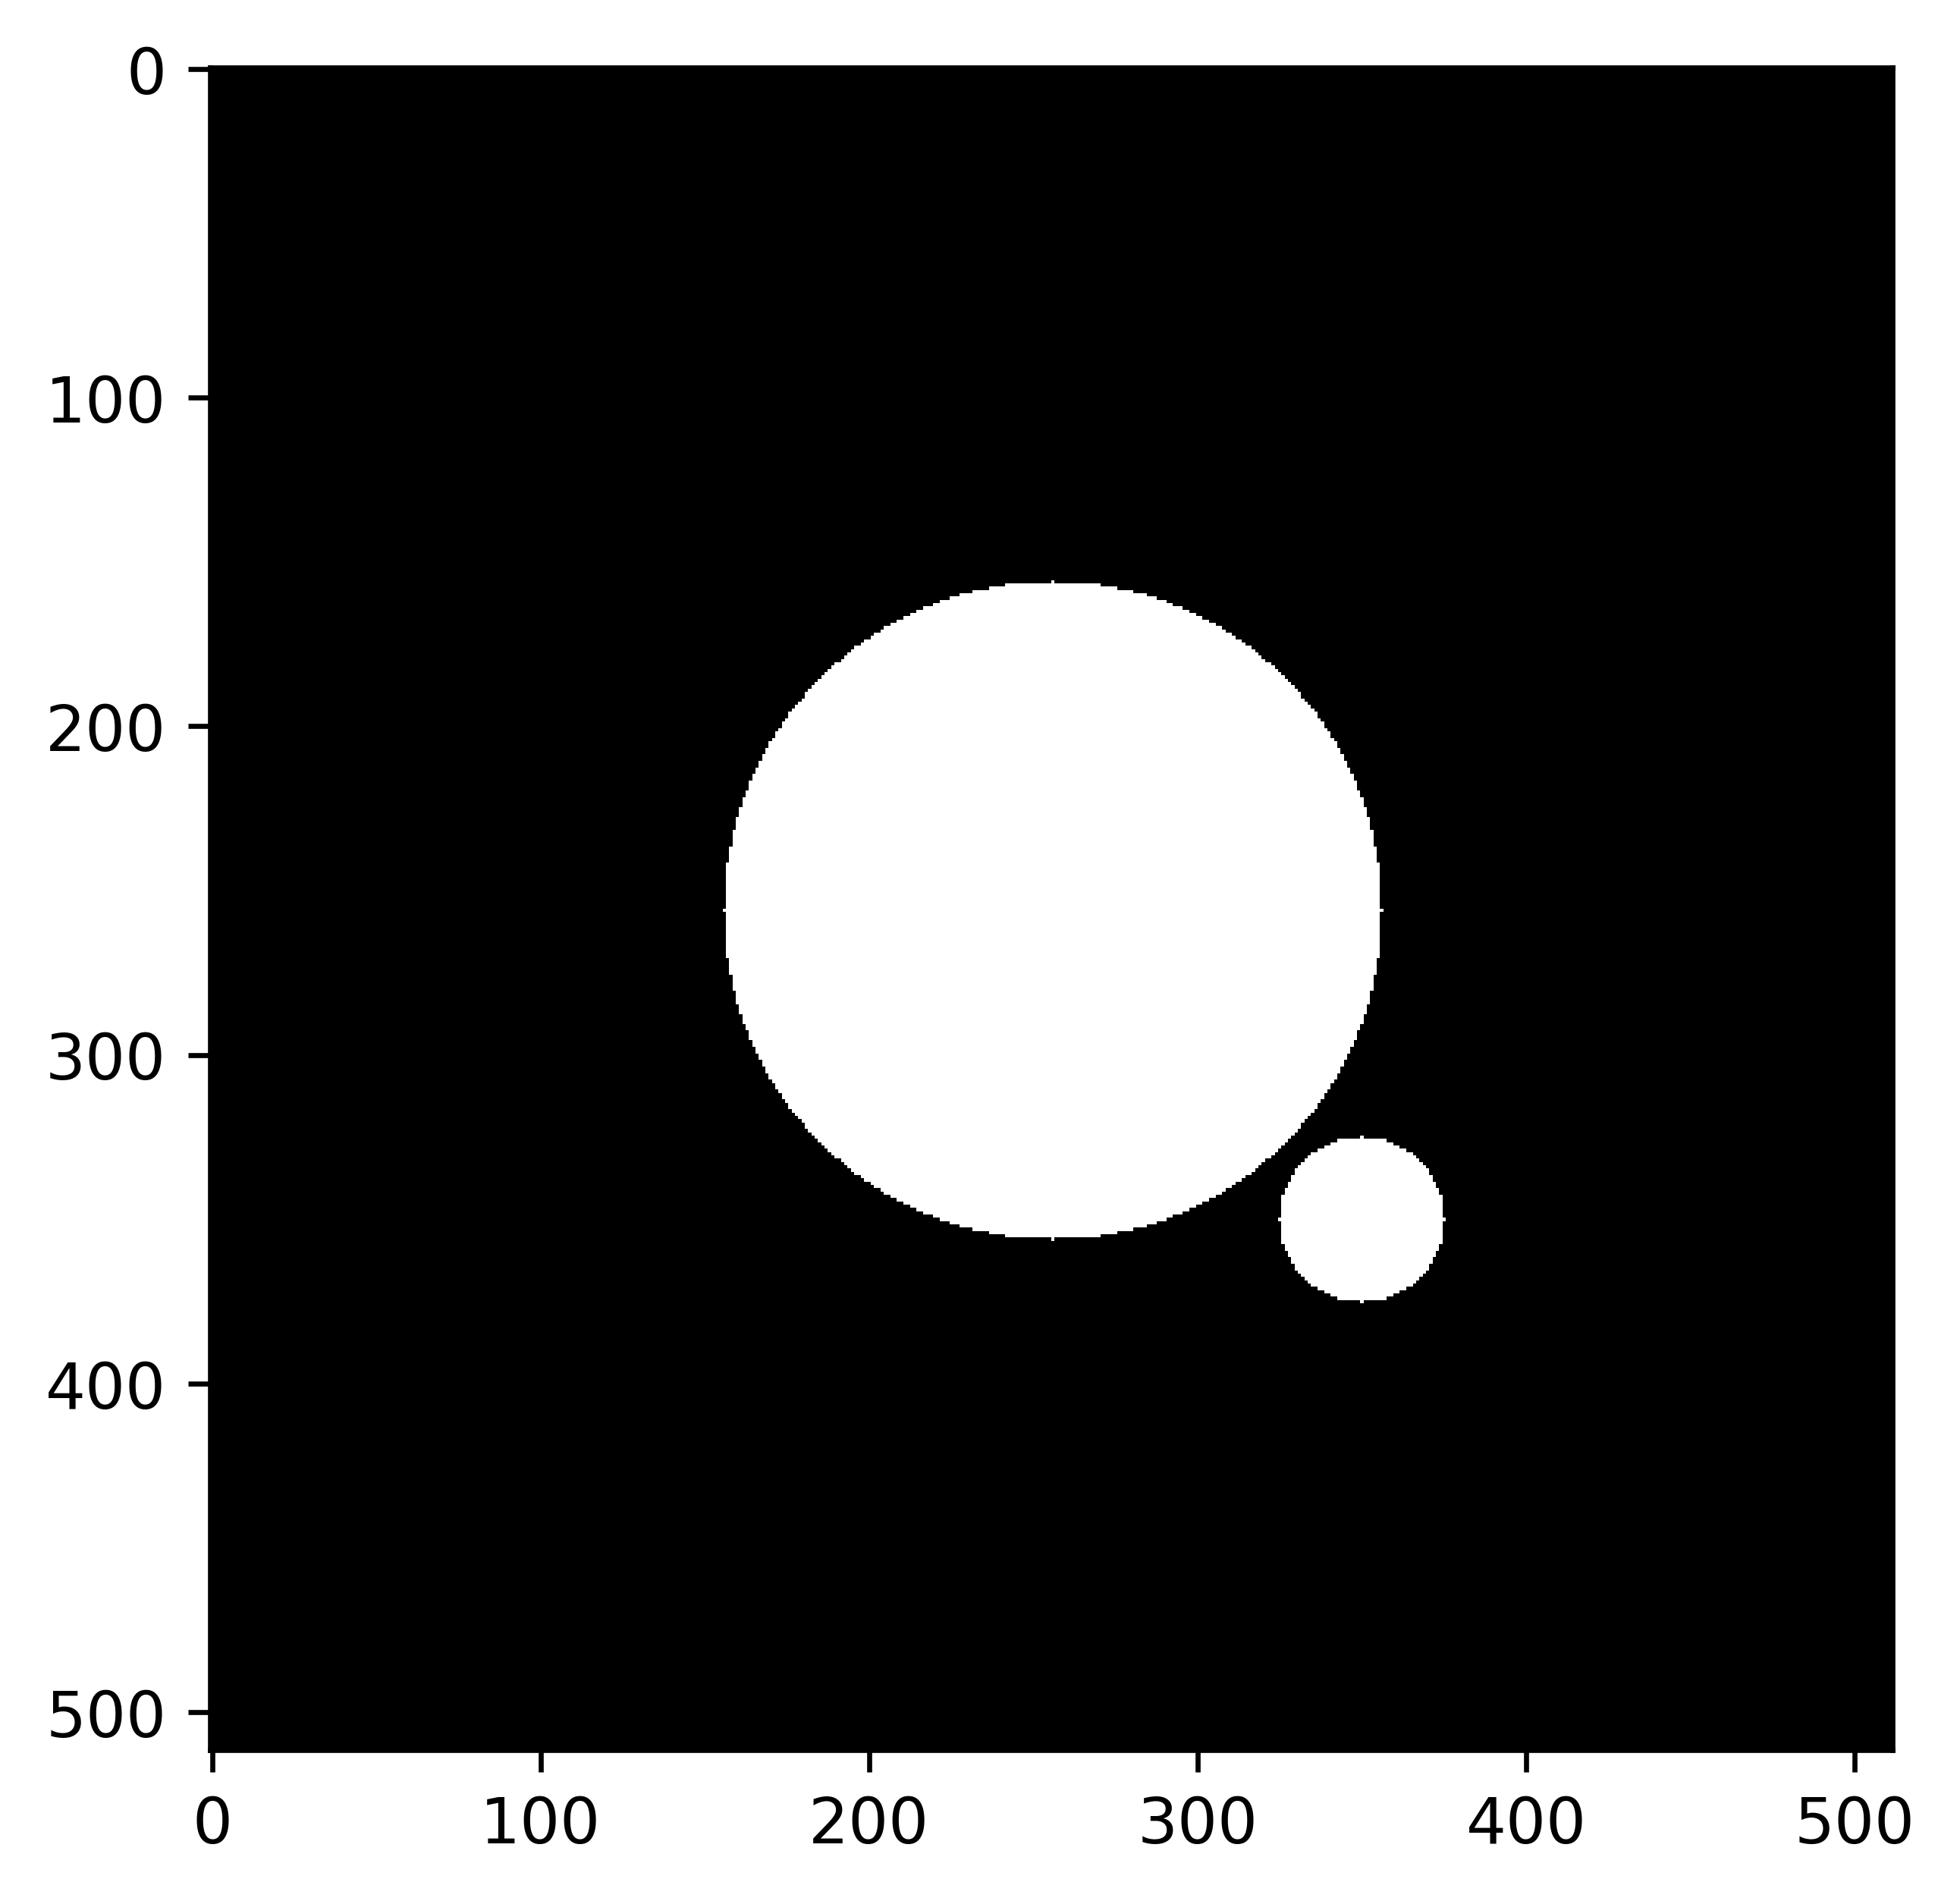

In [17]:
dip.DrawEllipsoid(a, (200, 200), (256, 256))
dip.DrawEllipsoid(a, (50, 50), (350, 350))
a.Show()

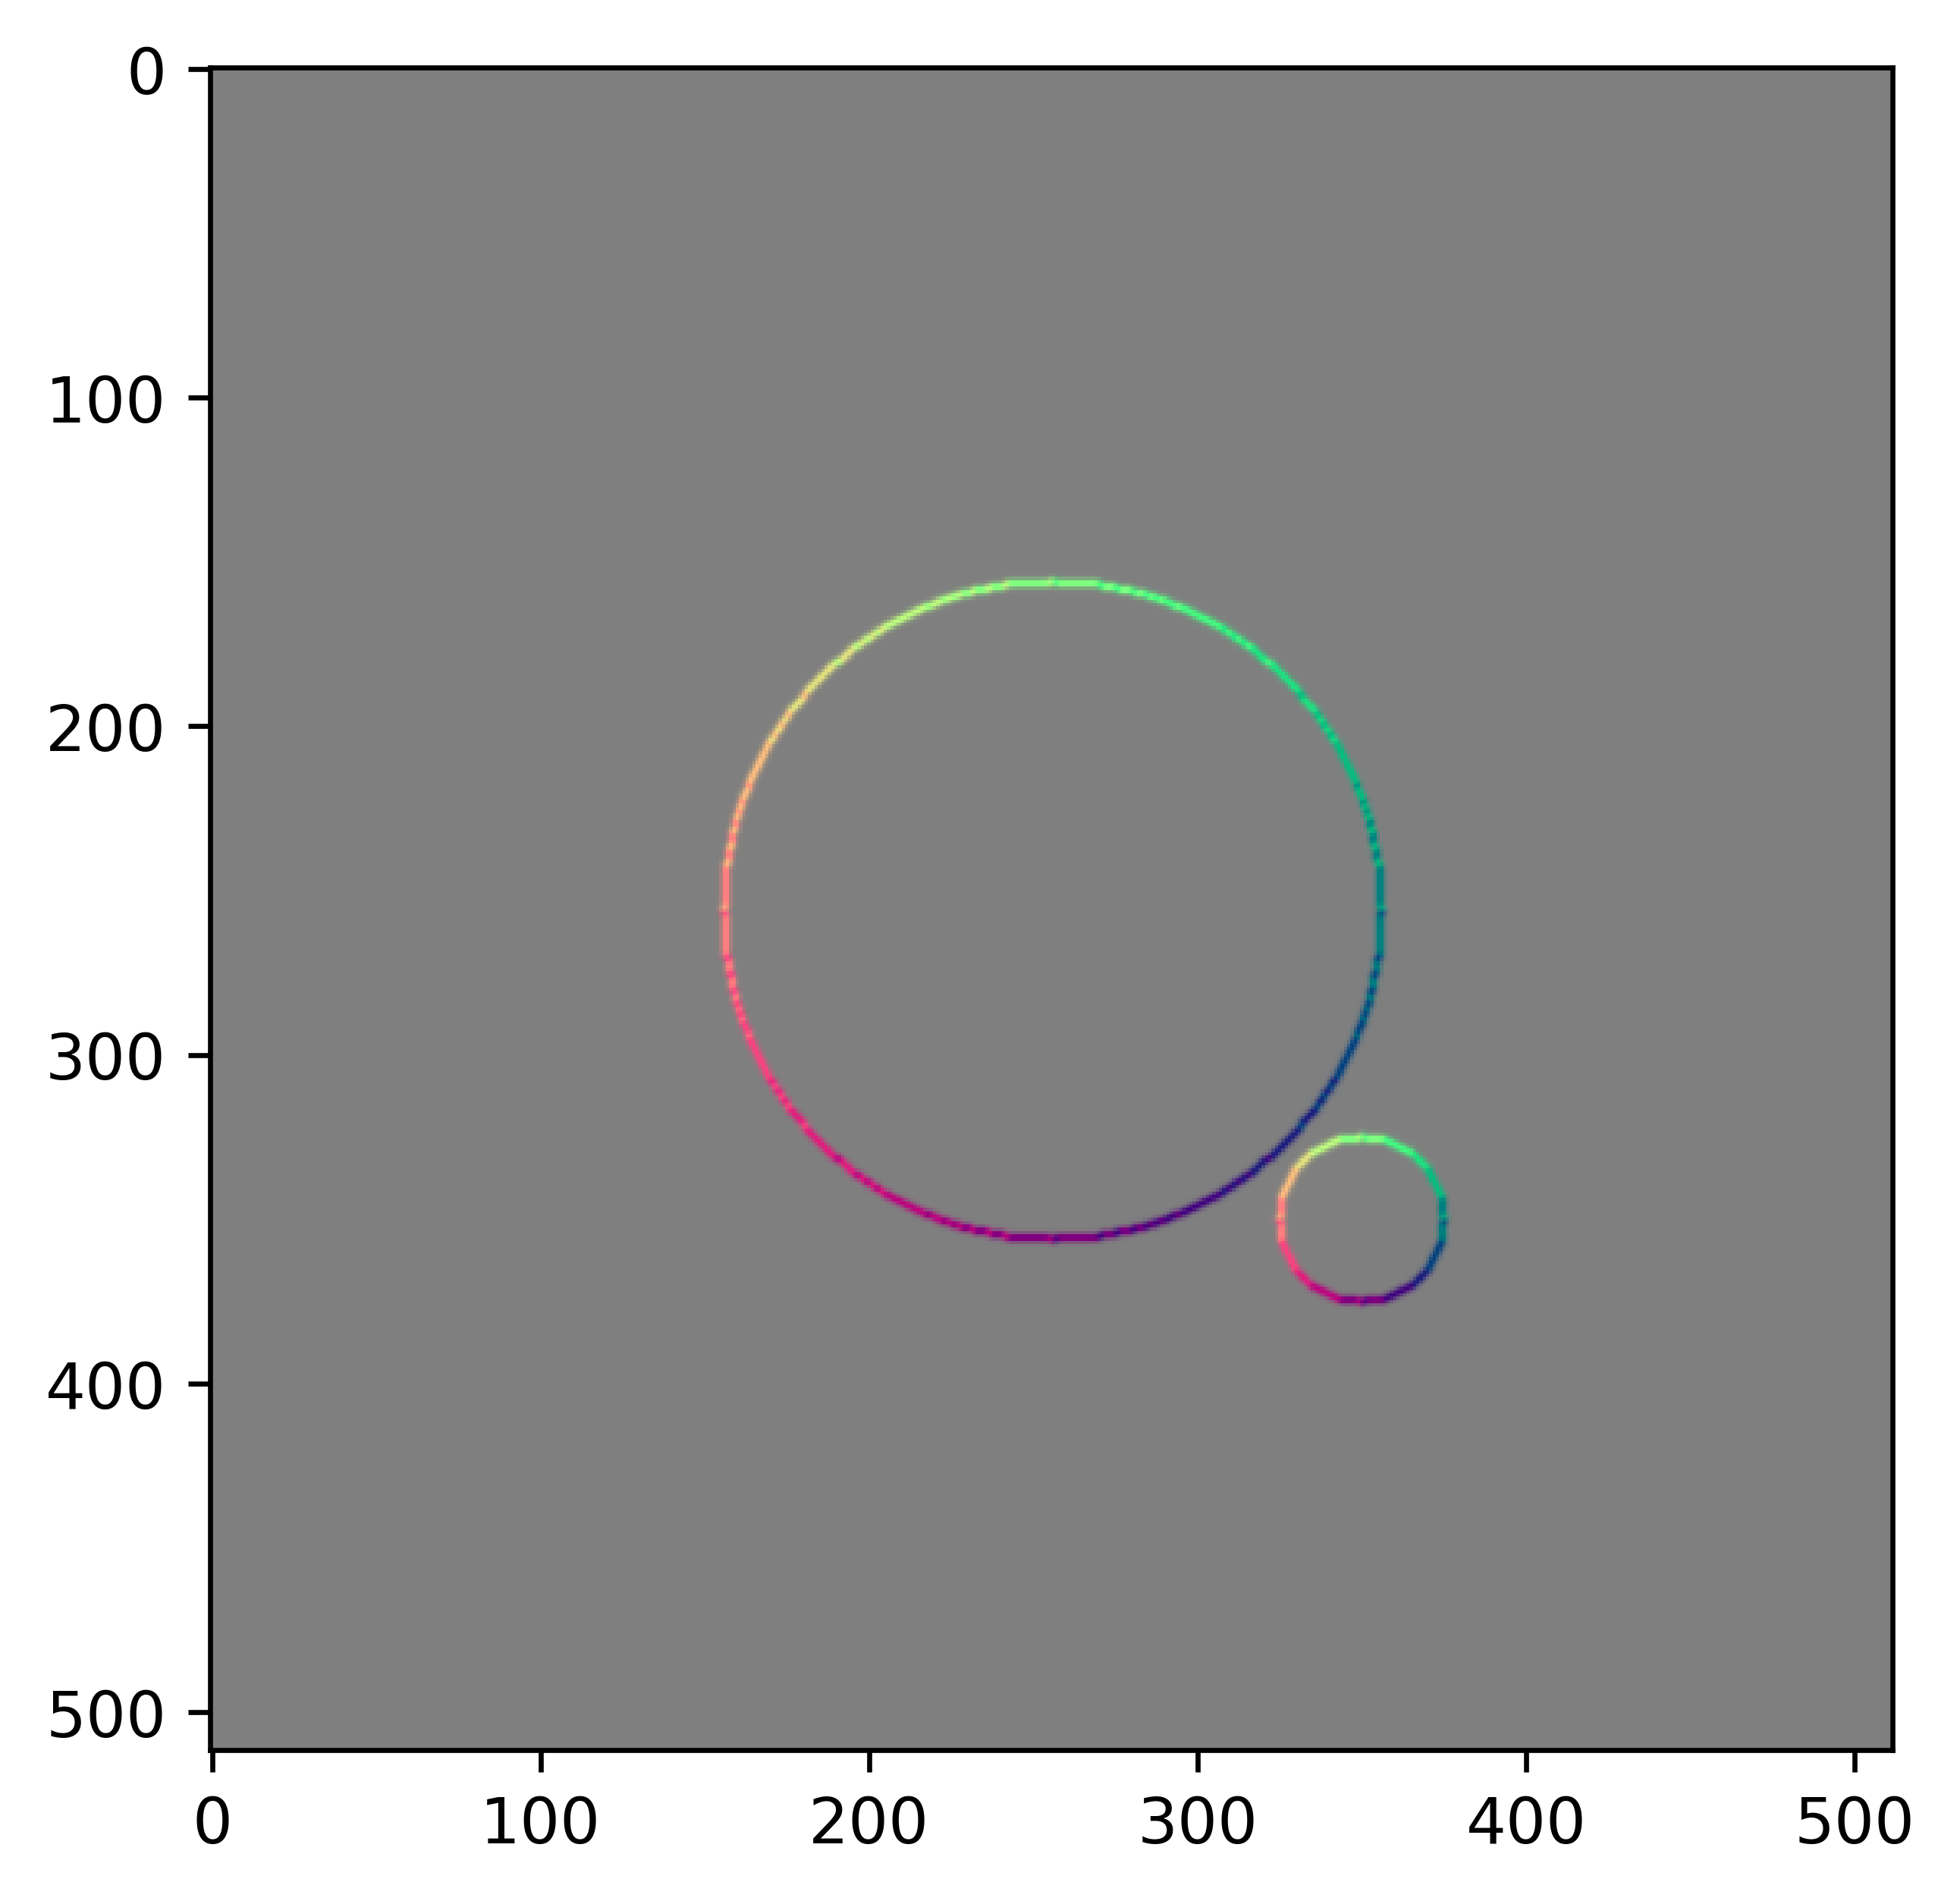

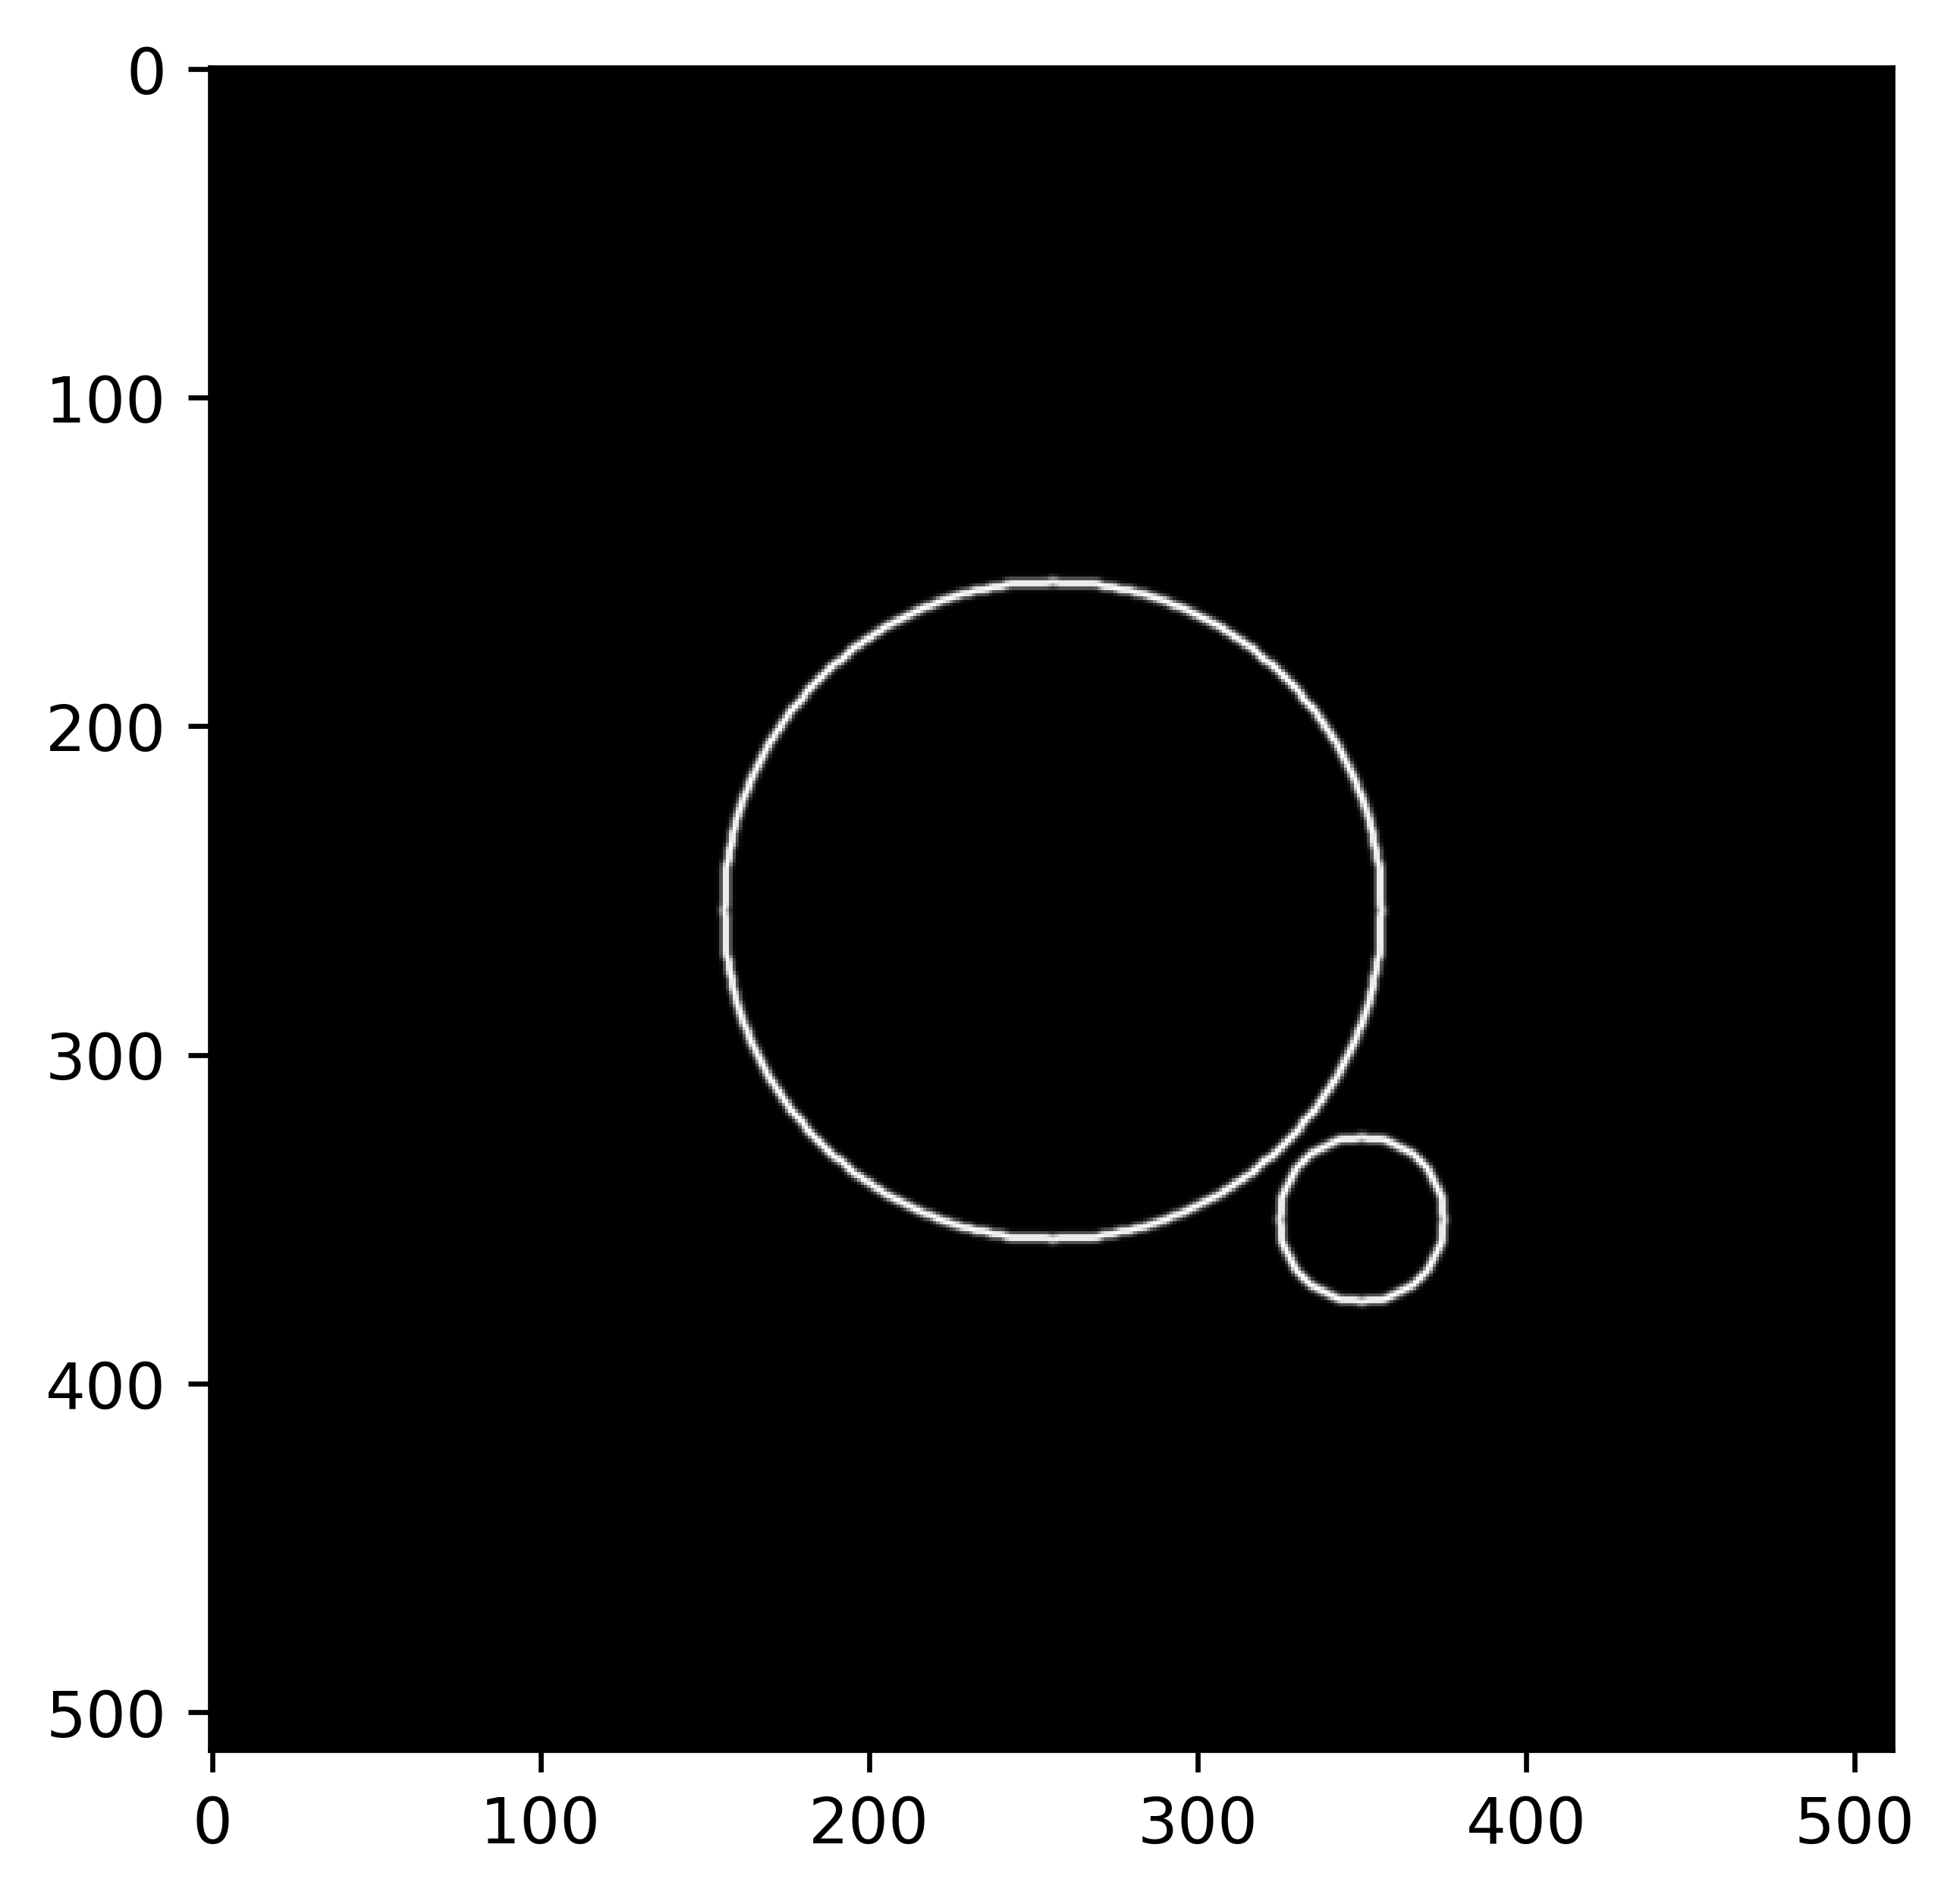

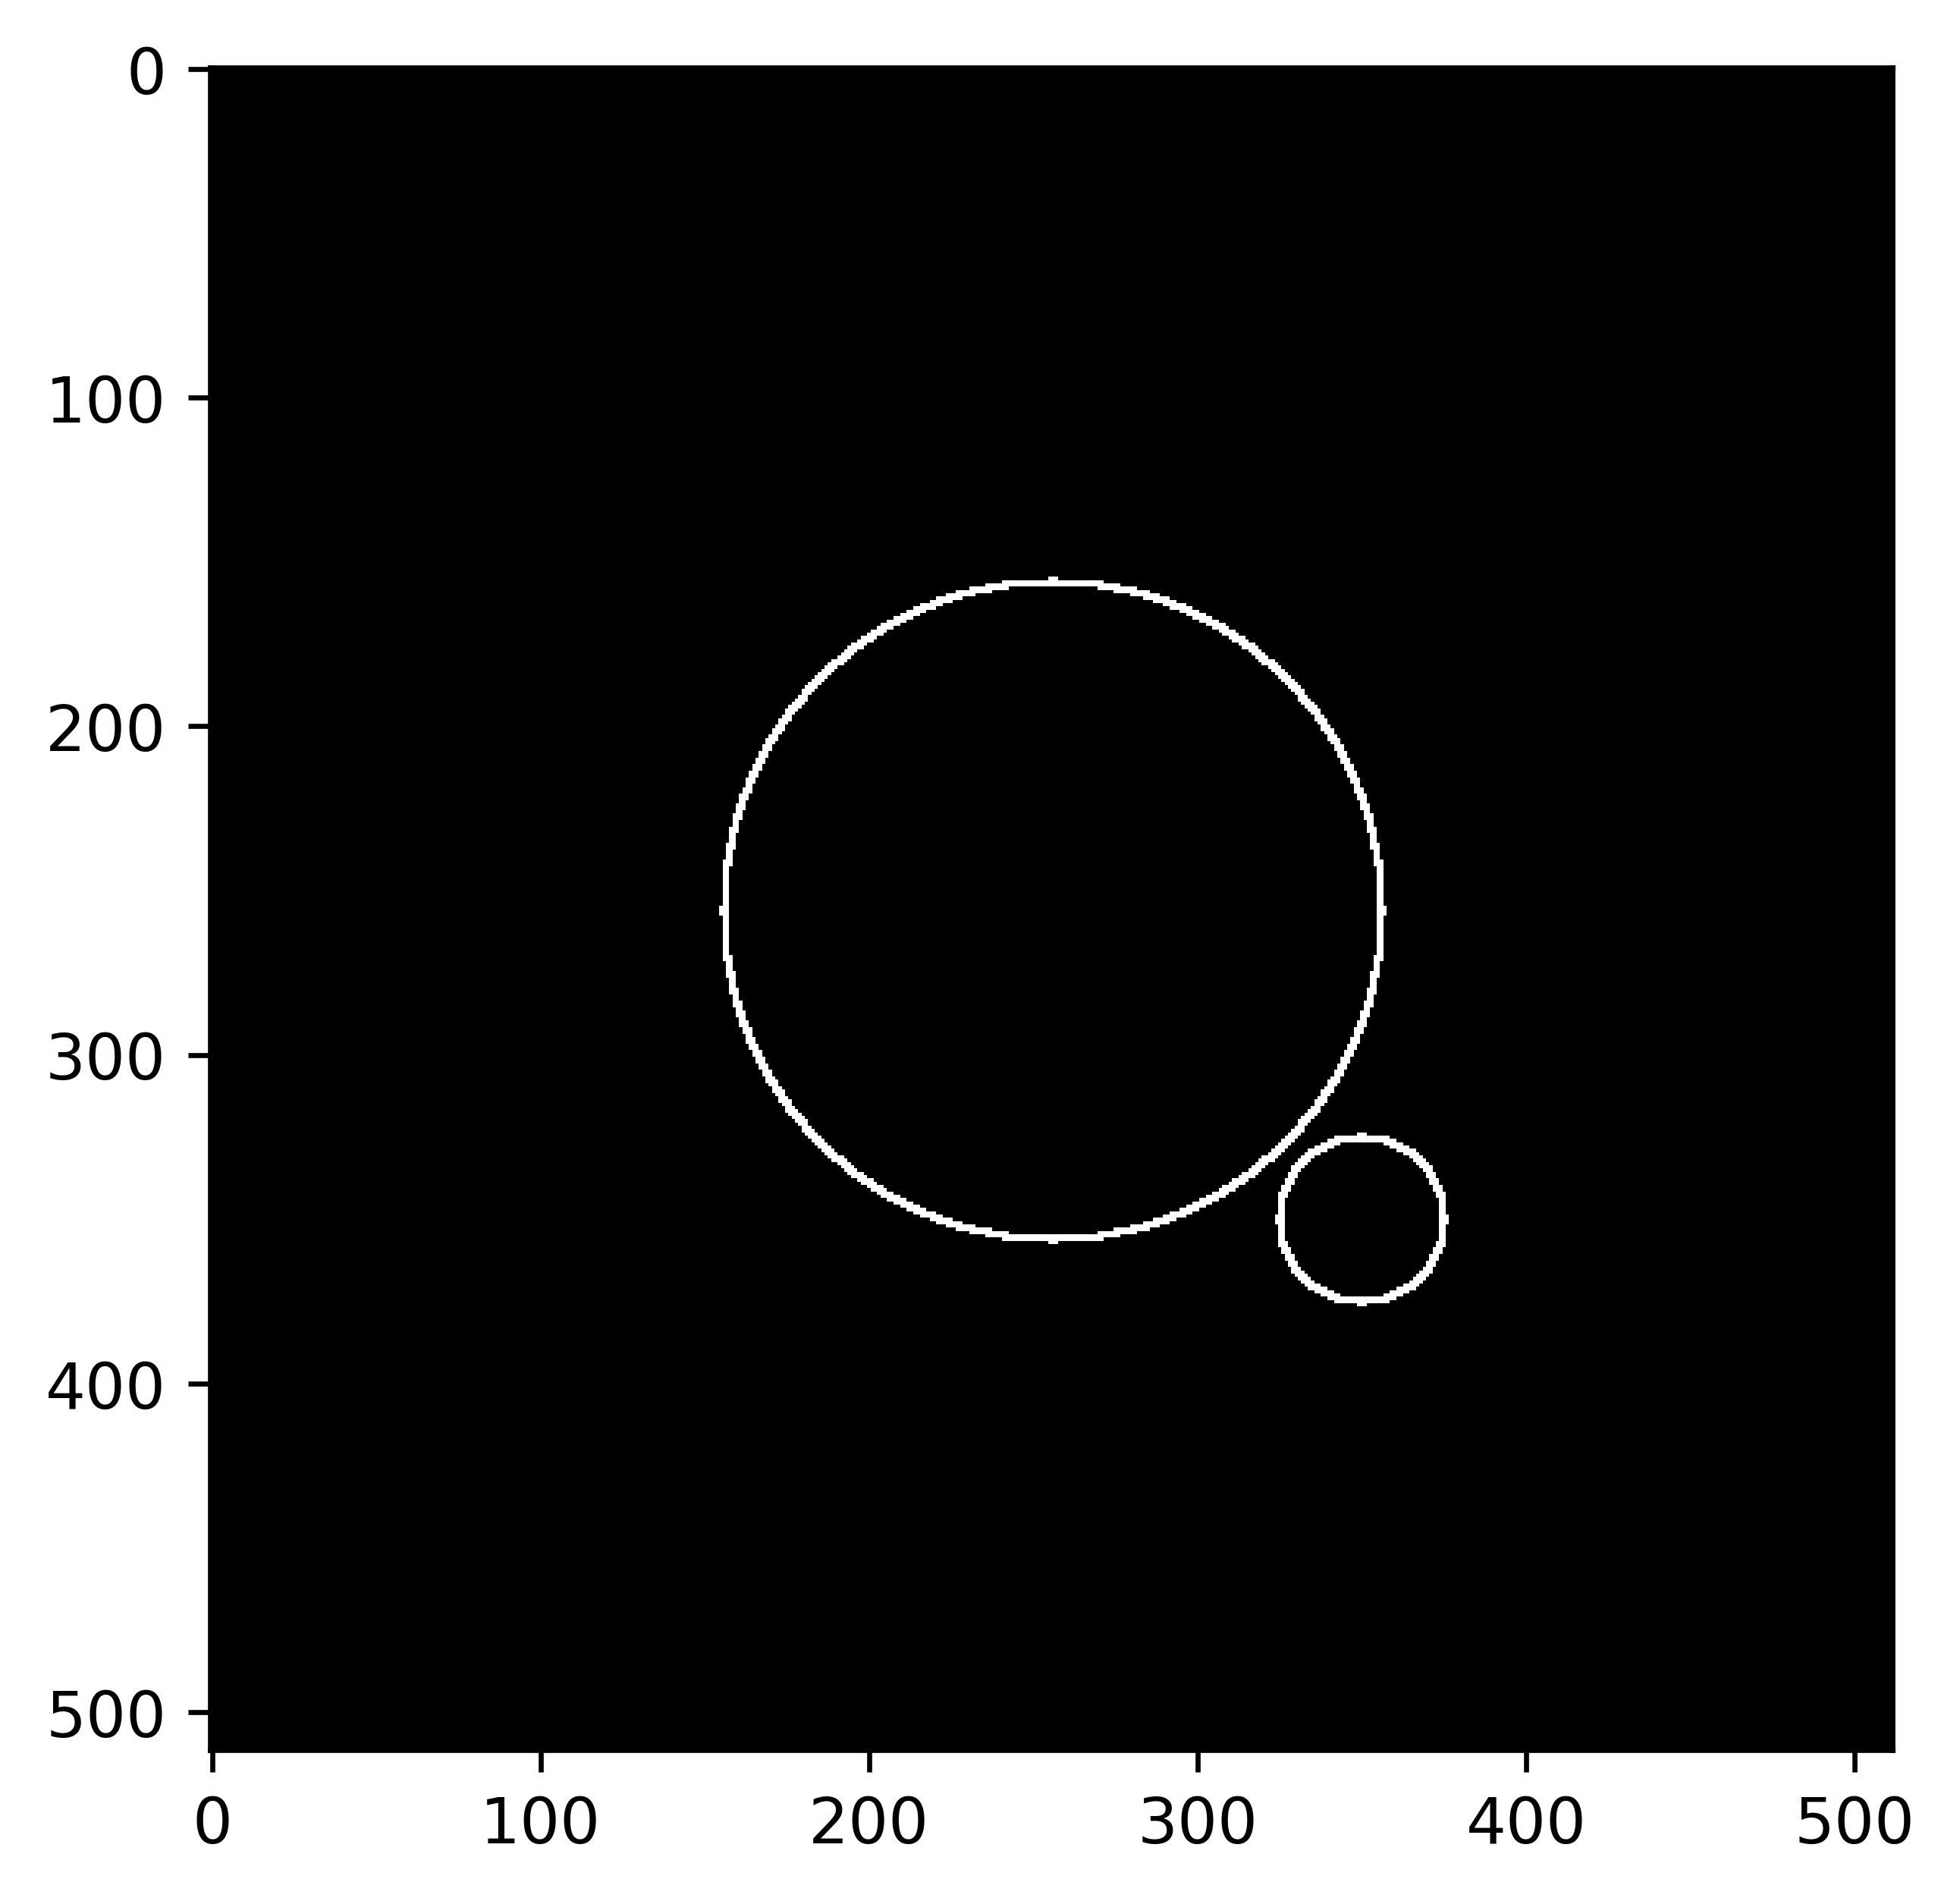

In [18]:
gv = dip.Gradient(a)
gv.Show()
gm = dip.Norm(gv)
gm.Show()
bin = dip.IsodataThreshold(gm)
bin.Show()

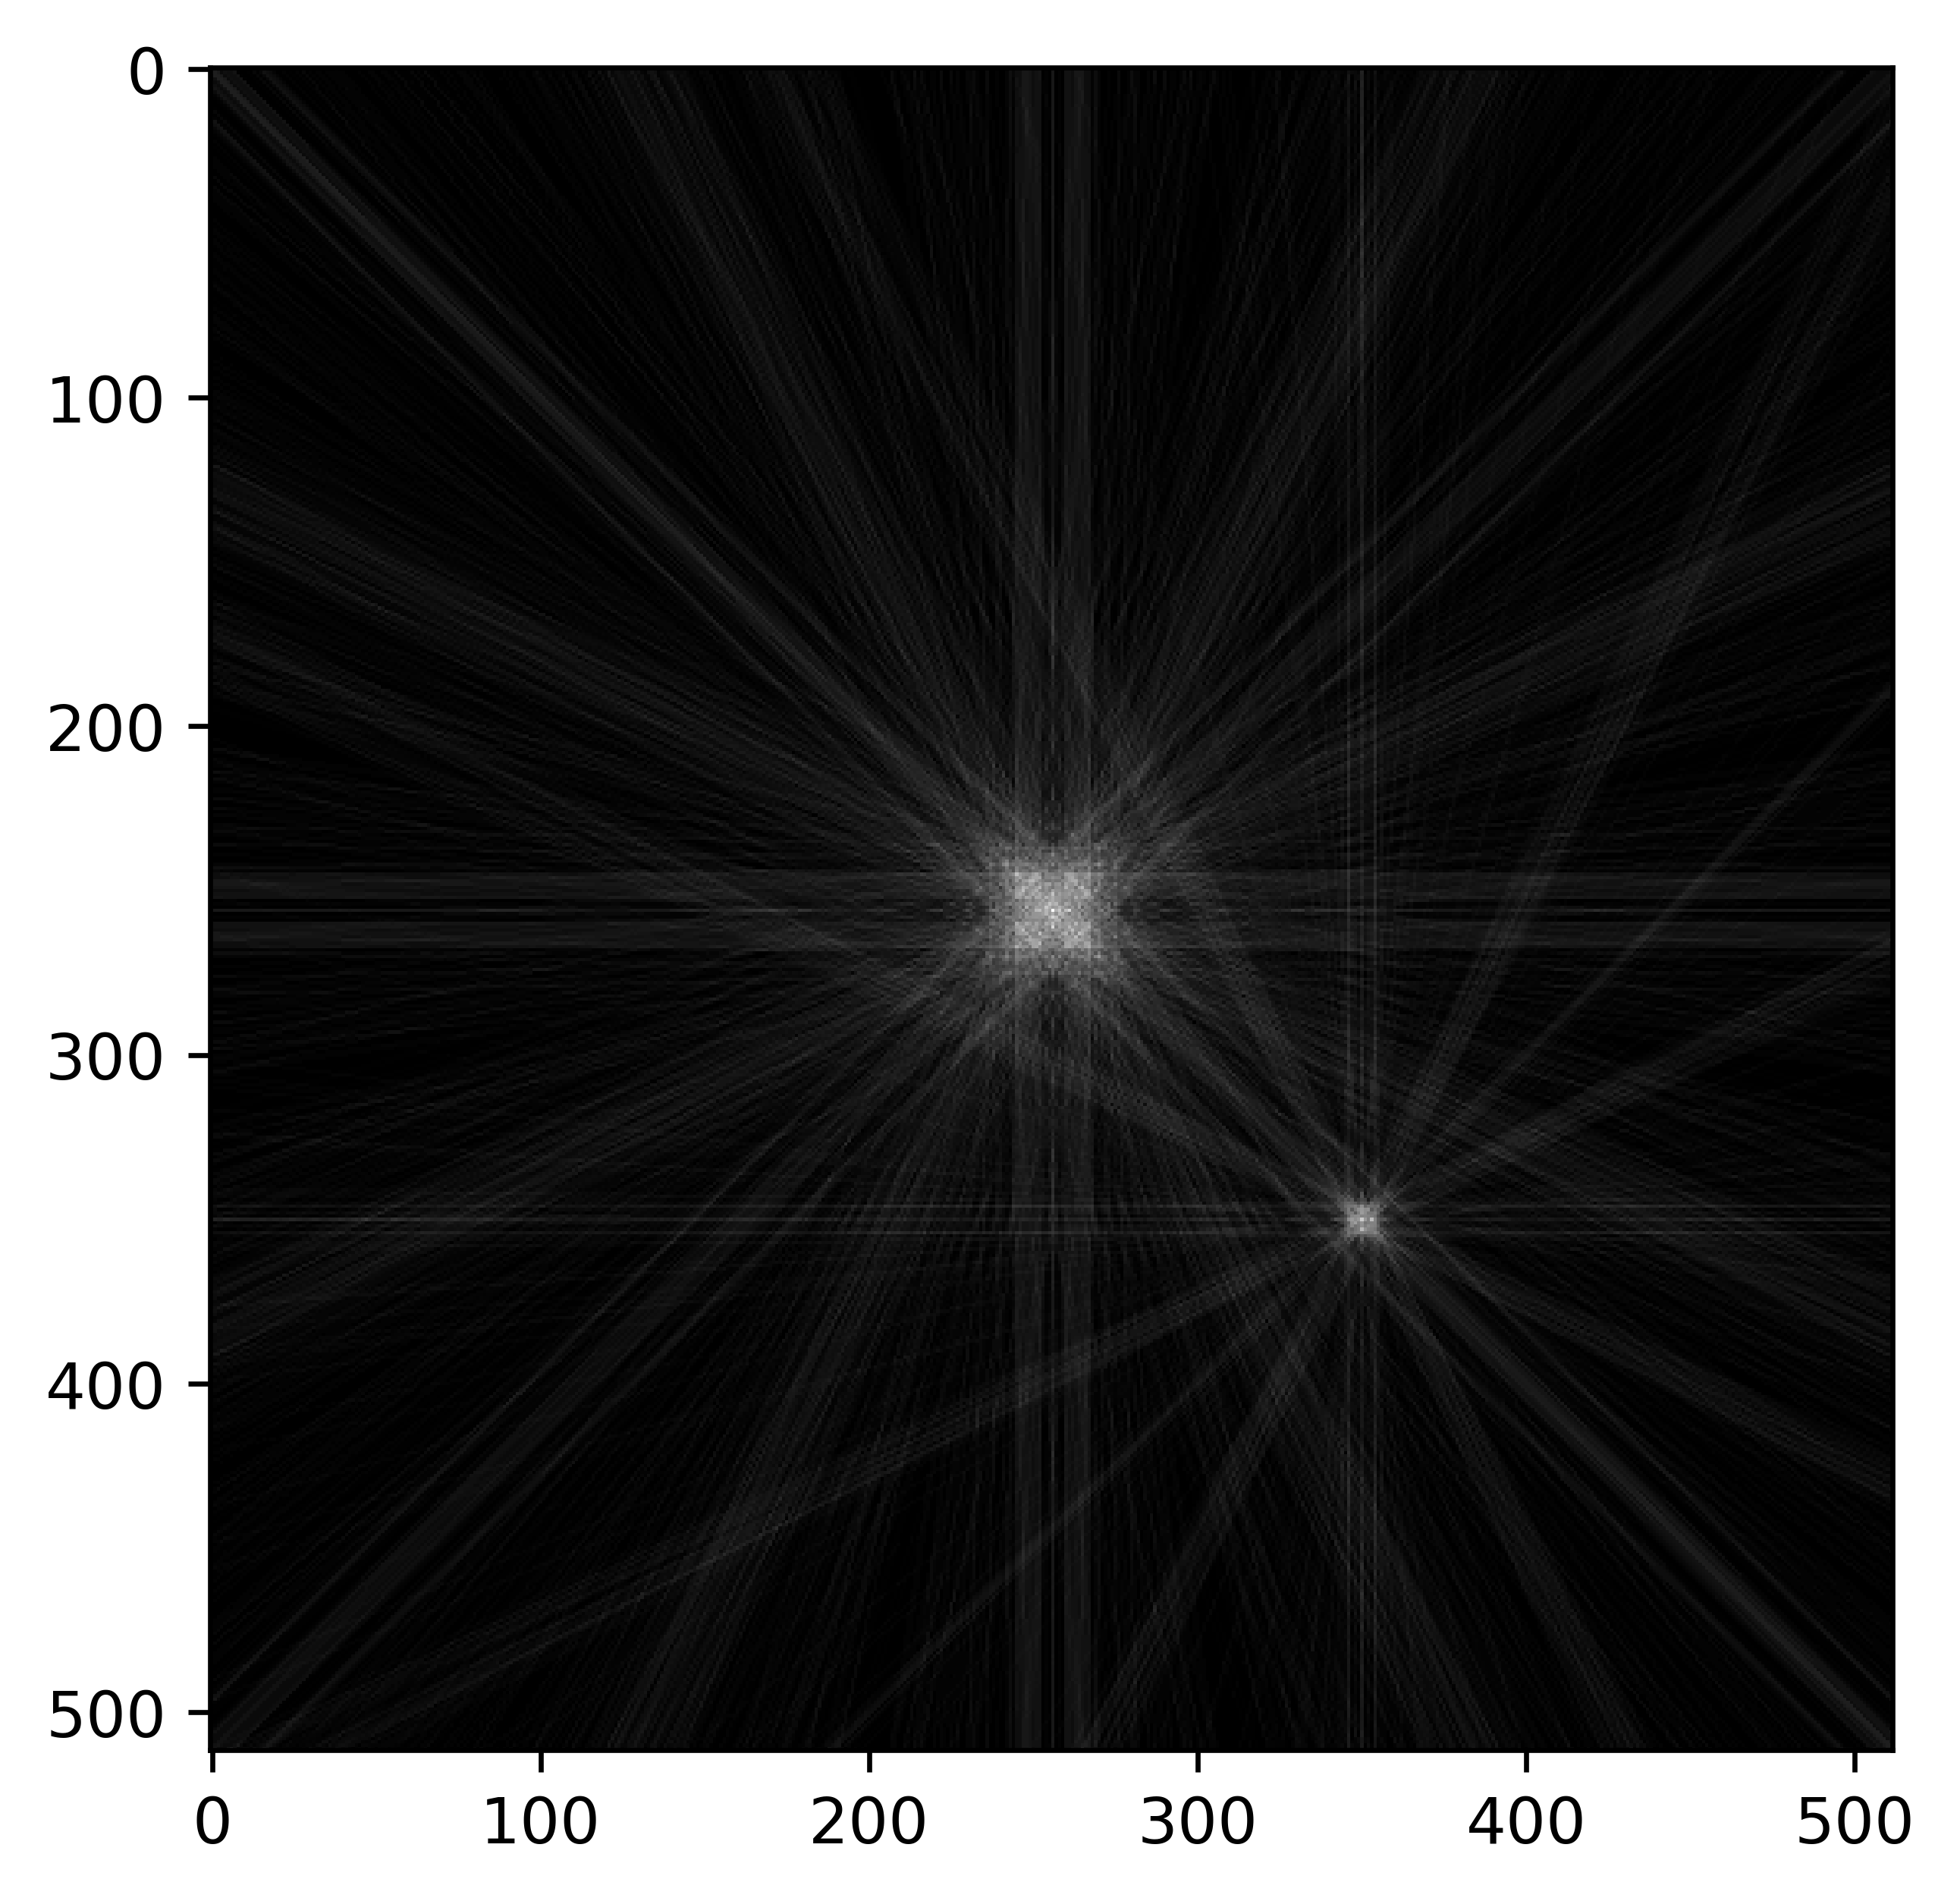

In [19]:
h = dip.HoughTransformCircleCenters(bin, gv)
h.Show()

In [21]:
m = dip.FindHoughMaxima(h, 10)
print(m)

[[256, 256], [350, 350], [238, 256], [236, 291], [291, 236], [276, 292], [221, 236], [223, 274], [282, 216], [222, 287], [354, 339], [307, 256], [339, 354], [225, 222], [208, 276], [256, 308], [256, 170], [170, 256], [256, 346], [346, 256], [297, 325], [238, 212], [279, 206], [47, 350], [201, 201], [265, 189], [295, 354], [350, 47], [311, 373], [189, 265], [256, 206], [350, 303], [217, 354], [331, 256], [256, 331], [440, 354], [246, 406], [354, 437], [205, 346], [350, 177], [235, 346], [346, 206], [390, 329], [329, 390], [205, 256], [431, 346], [346, 456], [373, 311], [354, 217], [402, 246], [452, 247], [346, 235], [317, 347], [188, 338], [383, 316], [210, 177], [465, 350], [172, 444], [147, 350], [295, 381], [177, 350], [264, 397], [393, 266], [277, 346], [325, 318], [346, 277], [193, 327], [324, 174], [302, 177], [422, 256], [256, 422], [350, 147], [247, 452], [92, 346], [346, 388], [469, 287], [287, 469], [456, 150], [85, 256], [256, 83], [419, 211], [235, 166], [164, 51], [52, 165]

In [22]:
c = dip.FindHoughCircles(bin, gv, (), 10)
print(c)    # 返回的是一个数组， 数组中的每一个子数组， 第一个元素是圆心的坐标， 第二个元素是半径

[[256.0, 256.0, 100.0], [350.0, 350.0, 25.0], [238.0, 256.0, 117.0], [236.0, 291.0, 139.0], [291.0, 236.0, 139.0], [276.0, 292.0, 140.0], [221.0, 236.0, 139.0], [223.0, 274.0, 137.0], [282.0, 216.0, 147.0], [222.0, 287.0, 145.0], [354.0, 339.0, 228.0], [307.0, 256.0, 150.0], [339.0, 354.0, 228.0], [225.0, 222.0, 145.0], [208.0, 276.0, 151.0], [256.0, 308.0, 151.0], [256.0, 170.0, 185.0], [170.0, 256.0, 185.0], [256.0, 346.0, 189.0], [346.0, 256.0, 189.0], [297.0, 325.0, 179.0], [238.0, 212.0, 147.0], [279.0, 206.0, 154.0], [47.0, 350.0, 328.0], [201.0, 201.0, 177.0], [265.0, 189.0, 167.0], [295.0, 354.0, 205.0], [350.0, 47.0, 328.0], [311.0, 373.0, 228.0], [189.0, 265.0, 167.0], [256.0, 206.0, 149.0], [350.0, 303.0, 204.0], [217.0, 354.0, 205.0], [331.0, 256.0, 174.0], [256.0, 331.0, 174.0], [440.0, 354.0, 308.0], [246.0, 406.0, 249.0], [354.0, 437.0, 305.0], [205.0, 346.0, 203.0], [350.0, 177.0, 222.0], [235.0, 346.0, 192.0], [346.0, 206.0, 202.0], [390.0, 329.0, 252.0], [329.0, 390.0

In [51]:
# Radon变换
c2 = dip.RadonTransformCircles(bin, radii=slice(90, 110), mode='subpixel projection')   # full projection subpixel projection

In [47]:
help(dip.RadonTransformCircles)

Help on built-in function RadonTransformCircles in module diplib.PyDIP_bin:

RadonTransformCircles(...) method of builtins.PyCapsule instance
    RadonTransformCircles(*args, **kwargs)
    Overloaded function.
    
    1. RadonTransformCircles(in: diplib.PyDIP_bin.Image, radii: slice = slice(10, 30, 1), sigma: float = 1.0, threshold: float = 1.0, mode: str = 'full', options: set[str] = {'correct', 'normalize'}) -> tuple
    
    Returns a tuple, the first element is the parameter space (the `out` image),
    the second element is a list of `dip.RadonCircleParameters` containing the
    parameters of the detected circles.
    
    2. RadonTransformCircles(in: diplib.PyDIP_bin.Image, *, out: diplib.PyDIP_bin.Image, radii: slice = slice(10, 30, 1), sigma: float = 1.0, threshold: float = 1.0, mode: str = 'full', options: set[str] = {'correct', 'normalize'}) -> list[diplib.PyDIP_bin.RadonCircleParameters]



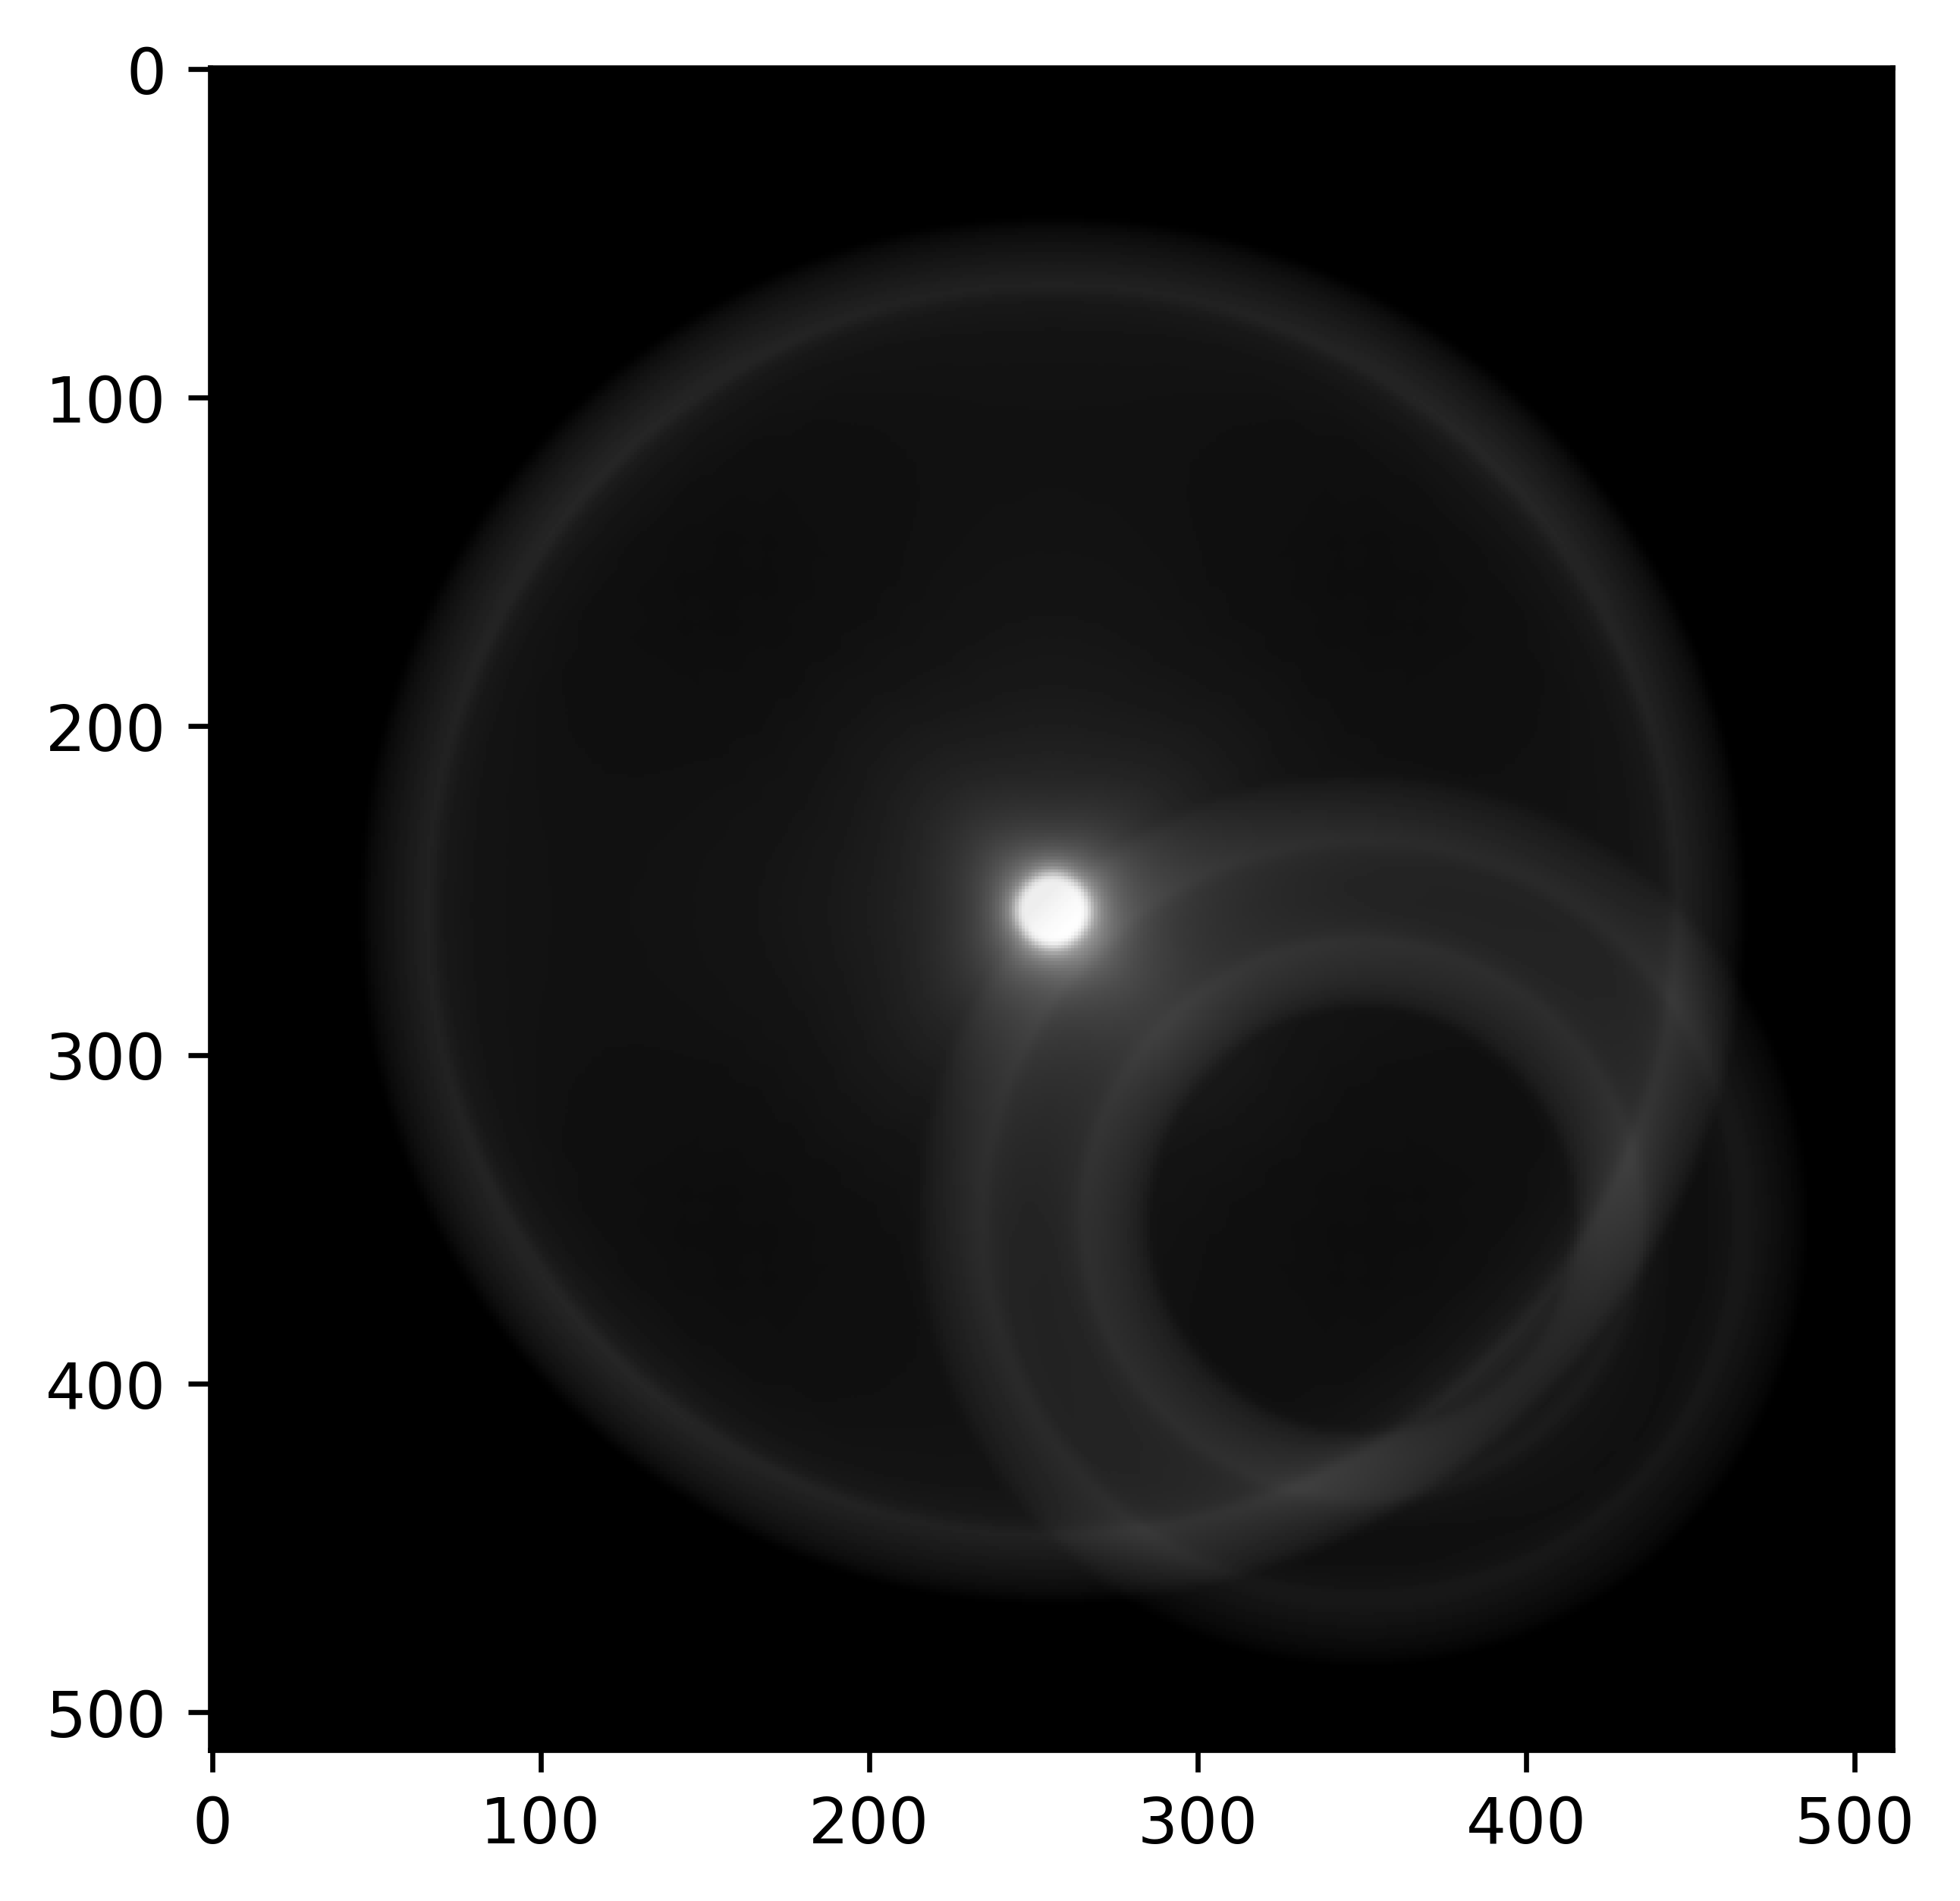

In [45]:
c2[0].Show()

In [52]:
print(c2[1])

[<RadonCircleParameters: origin={256, 256}, radius=100.003>]
